In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib


In [ ]:
dataset_df_1=pd.read_csv('/content/chungcu_batdongsan1.csv')
# #dataset_df_1=dataset_df_1.drop('date_submitted',axis=1)

dataset_df_2=pd.read_csv('/content/chungcu_batdongsan1100.csv')
# #dataset_df_2=dataset_df_2.drop('date_submitted',axis=1)


dataset_df_3=pd.read_csv('/content/chungcu_batdongsan1200.csv')
# # dataset_df_3=dataset_df_3.drop('date_submitted',axis=1)

dataset_df_4=pd.read_csv('/content/chungcu_batdongsan1600.csv')
# dataset_df_4=dataset_df_4.drop('date_submitted',axis=1)

dataset_df_5=pd.read_csv('/content/chungcu_batdongsan1800.csv')
# dataset_df_5=dataset_df_5.drop('date_submitted',axis=1)

dataset_df_6=pd.read_csv('/content/chungcu_batdongsan1900 (1).csv')
# dataset_df_6=dataset_df_6.drop('date_submitted',axis=1)

dataset_df_7=pd.read_csv('/content/chungcu_batdongsan2.csv')
# dataset_df_7=dataset_df_7.drop('date_submitted',axis=1)

dataset_df_8=pd.read_csv('/content/chungcu_batdongsan200.csv')
# dataset_df_8=dataset_df_8.drop('date_submitted',axis=1)

dataset_df_9=pd.read_csv('/content/chungcu_batdongsan2000.csv')
# dataset_df_9=dataset_df_9.drop('date_submitted',axis=1)

dataset_df_10=pd.read_csv('/content/chungcu_batdongsan2200.csv')
# dataset_df_10=dataset_df_10.drop('date_submitted',axis=1)

dataset_df_11=pd.read_csv('/content/chungcu_batdongsan2400.csv')
# # dataset_df_11=dataset_df_11.drop('date_submitted',axis=1)
dataset_df_12=pd.read_csv('/content/chungcu_batdongsan2900.csv')
# dataset_df_12=dataset_df_12.drop('date_submitted',axis=1)

dataset_df_13=pd.read_csv('/content/chungcu_batdongsan3.csv')
# dataset_df_13=dataset_df_13.drop('date_submitted',axis=1)

dataset_df_14=pd.read_csv('/content/chungcu_batdongsan4.csv')
# dataset_df_14=dataset_df_14.drop('date_submitted',axis=1)

dataset_df_15=pd.read_csv('/content/chungcu_batdongsan4000.csv')
# dataset_df_13=dataset_df_13.drop('date_submitted',axis=1)

dataset_df_16=pd.read_csv('/content/chungcu_batdongsan500 (1).csv')
# dataset_df_14=dataset_df_14.drop('date_submitted',axis=1)

dataset_df_15=pd.read_csv('/content/chungcu_batdongsan4000.csv')
# dataset_df_13=dataset_df_13.drop('date_submitted',axis=1)

dataset_df_16=pd.read_csv('/content/chungcu_batdongsan500 (1).csv')
# dataset_df_14=dataset_df_14.drop('date_submitted',axis=1)

dataset_df_17=pd.read_csv('/content/chungcu_batdongsan500 (1).csv')
# dataset_df_14=dataset_df_14.drop('date_submitted',axis=1)


dataset_df_18=pd.read_csv('/content/chungcu_batdongsan500.csv')
# dataset_df_14=dataset_df_14.drop('date_submitted',axis=1)

dataset_df_19=pd.read_csv('/content/chungcu_batdongsan5001.csv')
# dataset_df_14=dataset_df_14.drop('date_submitted',axis=1)

In [ ]:
dataset_df = pd.concat([dataset_df_1, dataset_df_2,dataset_df_3,dataset_df_4,dataset_df_5,dataset_df_6,dataset_df_7,dataset_df_8,dataset_df_9,dataset_df_10,dataset_df_11,dataset_df_12,dataset_df_13,dataset_df_14,dataset_df_15,dataset_df_16,dataset_df_17,dataset_df_18,dataset_df_19], ignore_index=True)


In [ ]:
# dataset_df_4['description'][0]

In [ ]:
dataset_df_19.head()

,title,links,price,area,price_per_m2,bedroom,toilet,location,description,balcony_direction,house_direction,property_legal_document,furniture,date_submitted
0,Chính chủ bán căn 83m2 2 ngủ 2VS full nội thất...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"6,9 tỷ",83 m²,"~83,13 triệu/m²",2 phòng,2 phòng,"Dự án 6th Element, Phường Xuân La, Tây Hồ, Hà Nội",Chính chủ do chuyển đổi mục đích sử dụng cần b...,0,0,Sổ đỏ/ Sổ hồng,0,13/04/2024
1,"Bán nhanh căn hộ Khang Phú 2PN, giá 2 tỷ 3, sổ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"2,3 tỷ",74 m²,"~31,08 triệu/m²",2 phòng,2 phòng,"Dự án Khang Phú, Đường Huỳnh Thiện Lộc, Phường...","Cần bán gấp căn hộ cao cấp Khang Phú, Quận Tân...",0,0,Sổ đỏ/ Sổ hồng,Không nội thất,13/04/2024
2,Bán căn hộ 3 phòng ngủ OSC Land đường Võ Thị S...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"2,8 tỷ",117 m²,"~23,93 triệu/m²",3 phòng,3 phòng,"Dự án OSC Land, Đường Võ Thị Sáu, Phường Thắng...",Bán căn hộ 3 phòng ngủ OSC Land đường Võ Thị S...,0,0,Sổ đỏ/ Sổ hồng,Nội thất đầy đủ.,13/04/2024
3,"Chỉ 1 không 2, giá thật 100%, 85m2 phòng khách...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,2 tỷ",85 m²,"~37,65 triệu/m²",2 phòng,2 phòng,"Dự án Homyland Riverside, Đường Nguyễn Duy Tri...",Giỏ hàng toàn căn giá tốt.\n2PN thoáng - phòng...,Nam,Nam,Hợp đồng mua bán,Đầy đủ,12/04/2024
4,Hàng hot! Bán Căn hộ 54 m2 - 2PN - 2 WC tại Vi...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,Thỏa thuận,54 m²,0,2 phòng,2 phòng,"Dự án Vinhomes D'Capitale, Đường Trần Duy Hưng...",- Căn hộ giá tốt siêu đẹp. Diện tích phù hợp m...,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ,13/04/2024


In [ ]:
# import pandas as pd

# # Đọc dữ liệu từ file CSV và xử lý lỗi khi đọc
# try:
#   dataset_df_6 = pd.read_csv('/content/chungcu_batdongsan500_7.csv', encoding='utf-16')

# except Exception as e:
#     print("Lỗi khi đọc file CSV:", e)
#     # Không cần gán dataset_df_6 = pd.DataFrame() ở đây

In [ ]:
# dataset_df = pd.concat([dataset_df_1, dataset_df_2,dataset_df_3,dataset_df_4,dataset_df_5,dataset_df_6,dataset_df_7,dataset_df_8,dataset_df_9,dataset_df_10,dataset_df_11,dataset_df_12,dataset_df_13,dataset_df_14], ignore_index=True)


In [ ]:
# numerical_cols = ['price_per_m2','area', 'bedroom', 'toilet']  # thay thế các giá trị thực tế của bạn
# categorical_cols = [ 'house_direction',	'property_legal_document','location']  # thay thế các giá trị thực tế của bạn

# #
# my_cols=categorical_cols+numerical_cols
# dataset_df_1 = dataset_df[my_cols]


In [ ]:
dataset_df.head()

,title,links,price,area,price_per_m2,bedroom,toilet,location,description,balcony_direction,house_direction,property_legal_document,furniture,date_submitted
0,"Bán CH có sân Sky Garden 2 Phú Mỹ Hưng Q. 7, D...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,7 tỷ",131 m²,"~43,51 triệu/m²",2 phòng,2 phòng,"Dự án Sky Garden 3, Đường Phạm Văn Nghị, Phườn...","Bán căn hộ có sân tại Sky garden 2, diện tích ...",Bắc,Nam,Sổ hồng cầm tay.,Full nội thất.,11/04/2024
1,Chính chủ bán CH Tây Hồ Riverview DT 75m2-3.2 ...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,2 tỷ",75 m²,"~42,67 triệu/m²",3 phòng,2 phòng,"Dự án Tây Hồ River View, Phố Thượng Thụy, Phườ...",Cần bán gấp 3 căn hộ chung cư Tây Hồ Riverview...,Bắc,0,Sổ đỏ/ Sổ hồng,0,17/04/2024
2,Cần tiền mua nhà mặt đất nên bán gấp căn 3PN -...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"4,85 tỷ",102 m²,"~47,55 triệu/m²",3 phòng,2 phòng,"Dự án Green Stars, Đường Phạm Văn Đồng, Phường...",Gia đình cần bán gấp căn hộ 3 phòng ngủ Green ...,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ,15/04/2024
3,"Bán căn hộ Kingston Nguyễn Văn Trỗi, 2 - 3PN, ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,2 tỷ",75 m²,"~69,33 triệu/m²",2 phòng,0,"Kingston Residence, 146, Đường Nguyễn Văn Trỗi...",Chung cư Kingston Residence - 146 Nguyễn Văn T...,0,0,0,0,17/04/2024
4,"Chính chủ bán căn 73m2 thông thủy, full đồ liề...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,24 tỷ",73 m²,"~44,38 triệu/m²",2 phòng,2 phòng,"Dự án Eco City Việt Hưng, Long Biên, Hà Nội","- Phòng khách vuông vắn, bếp đặt riêng biệt th...",0,0,Sổ đỏ/ Sổ hồng,0,15/04/2024


In [ ]:
# Data clean
dataset_df['area'] = dataset_df['area'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['price_per_m2'].replace(',', '.', regex=True, inplace=True)
dataset_df['price_per_m2'] = dataset_df['price_per_m2'].replace('[^\d.]', '', regex=True).astype(float)


In [ ]:

dataset_df['price_per_m2'] = dataset_df['price_per_m2'].astype(float)

dataset_df['price_per_m2'] = dataset_df['price_per_m2'].astype(float)

dataset_df = dataset_df[dataset_df['location'] != 0]


dataset_df['bedroom'] = dataset_df['bedroom'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['toilet'] = dataset_df['toilet'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['balcony_direction'] = dataset_df['balcony_direction'].replace('0', pd.NA, regex=False)
dataset_df['house_direction'] = dataset_df['house_direction'].replace('0', pd.NA, regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('0', pd.NA, regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('0', pd.NA, regex=False)


dataset_df = dataset_df.dropna(subset=['balcony_direction'])
dataset_df = dataset_df.dropna(subset=['house_direction'])
dataset_df = dataset_df.dropna(subset=['furniture'])

dataset_df['location']=dataset_df['location'].apply(lambda x: x.split(",") )
dataset_df= dataset_df.reset_index(drop=True)


In [ ]:
dataset_df['bedroom'].value_counts()

bedroom
2.0    6284
3.0    3917
1.0    1084
4.0     604
5.0      79
0.0      39
6.0      17
Name: count, dtype: int64

In [ ]:
for index, x in enumerate(dataset_df['location']):
    if len(x) < 5:
        print("Error in row {}: {}".format(index, x))
        dataset_df=dataset_df.drop(index,axis=0)





Error in row 6: ['Dự án CC1 Hà Đô Parkside', ' Phường Dịch Vọng', ' Cầu Giấy', ' Hà Nội']
Error in row 7: ['Dự án KĐT Linh Đàm', ' Phường Đại Kim', ' Hoàng Mai', ' Hà Nội']
Error in row 8: ['Phường Nhân Chính', ' Thanh Xuân', ' Hà Nội']
Error in row 10: ['Đường 3', ' tổ 27 Thị trấn Đông Anh', ' Đông Anh', ' Hà Nội']
Error in row 15: ['Đường Hoàng Quốc Việt', ' Phường Cổ Nhuế 1', ' Bắc Từ Liêm', ' Hà Nội']
Error in row 17: ['Dự án Eco Dream', ' Xã Tân Triều', ' Thanh Trì', ' Hà Nội']
Error in row 20: ['Dự án Bea Sky', ' Phường Đại Kim', ' Hoàng Mai', ' Hà Nội']
Error in row 22: ['Dự án CT1 Yên Nghĩa', ' Phường Yên Nghĩa', ' Hà Đông', ' Hà Nội']
Error in row 28: ['Đường Nguyễn Trãi', ' Phường Thượng Đình', ' Thanh Xuân', ' Hà Nội']
Error in row 29: ['Dự án Nam Xa la', ' Phường Phúc La', ' Hà Đông', ' Hà Nội']
Error in row 30: ['Đường Giải Phóng', ' Phường Giáp Bát', ' Hoàng Mai', ' Hà Nội']
Error in row 35: ['Đường Giải Phóng', ' Phường Giáp Bát', ' Hoàng Mai', ' Hà Nội']
Error in row 36

In [ ]:
dataset_df['Tỉnh']=dataset_df['location'].apply(lambda x :x[-1] )
dataset_df['Quận']=dataset_df['location'].apply(lambda x :x[-2] )
dataset_df['Phường']=dataset_df['location'].apply(lambda x :x[-3] )
dataset_df['Đường']=dataset_df['location'].apply(lambda x :x[-4] )


In [ ]:
dataset_df.head()

,title,links,price,area,price_per_m2,bedroom,toilet,location,description,balcony_direction,house_direction,property_legal_document,furniture,date_submitted,Tỉnh,Quận,Phường,Đường
0,"Bán CH có sân Sky Garden 2 Phú Mỹ Hưng Q. 7, D...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,7 tỷ",131.0,43.51,2.0,2.0,"[Dự án Sky Garden 3, Đường Phạm Văn Nghị, Ph...","Bán căn hộ có sân tại Sky garden 2, diện tích ...",Bắc,Nam,Sổ hồng cầm tay.,Full nội thất.,11/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Phong,Đường Phạm Văn Nghị
1,"Chủ ngợp bán Him Lam, 86m2, 2PN 2WC, full nội ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,25 tỷ",86.0,37.79,2.0,2.0,"[Dự án Him Lam Chợ Lớn, Đường Hậu Giang, Phư...","Cần bán chung cư Him Lam, Q6 diện tích 86m², 2...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hồ Chí Minh.,Quận 6,Phường 11,Đường Hậu Giang
2,"Bán căn hộ Flemington, Q11, 87m2, 2 phòng ngủ,...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"4,6 tỷ",87.0,52.87,2.0,2.0,"[The Flemington, 184, Đường Lê Đại Hành, Ph...","Bán căn hộ Flemington, địa chỉ: 184 Lê Đại Hàn...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hồ Chí Minh,Quận 11,Phường 15,Đường Lê Đại Hành
3,Bán căn hộ góc 4pn 161m2 hướng Đông Nam tầng t...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,70 triệu/m²,161.0,11.27,4.0,3.0,"[Dự án BRG Diamond Residence, Đường Lê Văn Lư...",Bán căn hộ 4PN góc giá tốt nhất dự án BRG Lê V...,Đông - Nam,Tây - Nam,Hợp đồng mua bán,Không nội thất,17/04/2024,Hà Nội,Thanh Xuân,Phường Nhân Chính,Đường Lê Văn Lương
4,"Tôi chính chủ bán căn hộ 134m, 4 ngủ, 3vs tại ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"9,5 tỷ",134.0,70.90,4.0,3.0,"[Dự án The Park Home, Đường Thành Thái, Phườ...",Tôi chính chủ bán căn hộ 134m tại dự án The Pa...,Đông - Bắc,Tây - Nam,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hà Nội,Cầu Giấy,Phường Dịch Vọng,Đường Thành Thái


In [ ]:
# Lưu DataFrame thành tệp CSV trên máy tính của bạn
dataset_df.to_csv('dataset_batdongsan.csv', index=False)

dataset_df=pd.read_csv('/content/dataset_batdongsan.csv')
# dataset_df_1=dataset_df_1.drop('date_submitted',axis=1)
# dataset_df_2=pd.read_csv('/content/dataset_nha_tot.csv')
# dataset_df_2=dataset_df_1.drop('date_submitted',axis=1)

In [ ]:
dataset_df=pd.read_csv('/content/dataset_batdongsan.csv')
# dataset_df_1=dataset_df_1.drop('date_submitted',axis=1)

In [ ]:
dataset_df.head()
len(dataset_df)

9352

In [ ]:
dataset_df = dataset_df[dataset_df['price_per_m2'] != 0]


In [ ]:
dataset_df = dataset_df[(dataset_df['toilet'] != 0)&(dataset_df['toilet'] < 5 )]
dataset_df = dataset_df[(dataset_df['bedroom'] != 0)&(dataset_df['bedroom'] < 5 )]


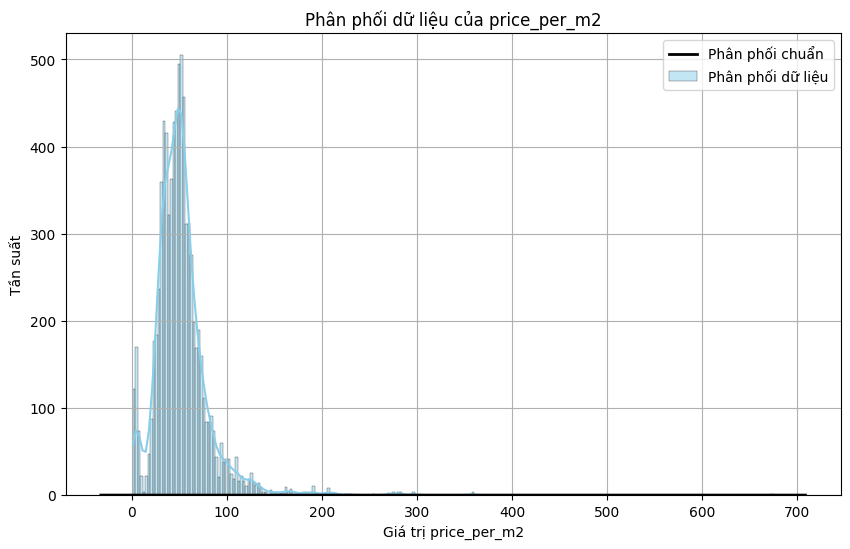

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tính giá trị trung bình và phương sai của cột 'price_per_m2'
mean_value = dataset_df['price_per_m2'].mean()
std_dev = dataset_df['price_per_m2'].std()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset_df['price_per_m2'], kde=True, color='skyblue', label='Phân phối dữ liệu')

# Vẽ đường phân phối chuẩn
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_value, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Phân phối chuẩn')

plt.title('Phân phối dữ liệu của price_per_m2')
plt.xlabel('Giá trị price_per_m2')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

dataset_df=dataset_df[(dataset_df['price_per_m2'] <100)&(dataset_df['price_per_m2'] >30) ]


In [ ]:
dataset_df['toilet'].value_counts()


toilet
2.0    5048
1.0     942
3.0     373
4.0      44
Name: count, dtype: int64

In [ ]:
dataset_df['bedroom'].value_counts()

bedroom
2.0    3323
3.0    2243
1.0     569
4.0     272
Name: count, dtype: int64

In [ ]:
dataset_df=dataset_df[(dataset_df['Tỉnh'] ==' Hà Nội')|(dataset_df['Tỉnh'] ==' Hồ Chí Minh') ]
dataset_df.head(200)

,title,links,price,area,price_per_m2,bedroom,toilet,location,description,balcony_direction,house_direction,property_legal_document,furniture,date_submitted,Tỉnh,Quận,Phường,Đường
0,"Bán CH có sân Sky Garden 2 Phú Mỹ Hưng Q. 7, D...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,7 tỷ",131.0,43.51,2.0,2.0,"['Dự án Sky Garden 3', ' Đường Phạm Văn Nghị',...","Bán căn hộ có sân tại Sky garden 2, diện tích ...",Bắc,Nam,Sổ hồng cầm tay.,Full nội thất.,11/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Phong,Đường Phạm Văn Nghị
2,"Bán căn hộ Flemington, Q11, 87m2, 2 phòng ngủ,...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"4,6 tỷ",87.0,52.87,2.0,2.0,"['The Flemington', ' 184', ' Đường Lê Đại Hành...","Bán căn hộ Flemington, địa chỉ: 184 Lê Đại Hàn...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hồ Chí Minh,Quận 11,Phường 15,Đường Lê Đại Hành
4,"Tôi chính chủ bán căn hộ 134m, 4 ngủ, 3vs tại ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"9,5 tỷ",134.0,70.90,4.0,3.0,"['Dự án The Park Home', ' Đường Thành Thái', '...",Tôi chính chủ bán căn hộ 134m tại dự án The Pa...,Đông - Bắc,Tây - Nam,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hà Nội,Cầu Giấy,Phường Dịch Vọng,Đường Thành Thái
6,"Bán gấp căn hộ 80m2, 2 phòng ngủ, 2WC, nhà mới...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,5 tỷ,80.0,62.50,2.0,2.0,"['Dự án Eco Green Sài Gòn', ' Đường Nguyễn Văn...",ECOGREENSAIGON mua ở hoặc đầu tư đều tốt.\nBán...,Đông,Bắc,Hợp đồng mua bán,Cơ bản,08/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Thuận Tây,Đường Nguyễn Văn Linh
8,Chuyên chuyển nhượng Chelsea Residence - 3PN 1...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,8 tỷ,115.0,69.56,3.0,2.0,"['Dự án Chelsea Residences', ' Đường Trần Kim ...","+ Hướng cửa TN, ban công ĐB.\n+ Tầng trung vie...",Đông - Bắc,Tây - Nam,Sổ đỏ/ Sổ hồng,Đầy đủ.,09/04/2024,Hà Nội,Cầu Giấy,Phường Yên Hòa,Đường Trần Kim Xuyến
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Giá chuẩn căn 3 ngủ Mỹ Đình Plaza 2, Nguyễn Ho...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,5 tỷ",110.0,50.00,3.0,2.0,"['Dự án Mỹ Đình Plaza 2', ' Đường Nguyễn Hoàng...","Tôi cần bán căn hộ Mỹ Đình Plaza 2, Nguyễn Hoà...",Đông - Nam,Tây - Bắc,Sổ đỏ/ Sổ hồng,Đầy đủ,16/04/2024,Hà Nội,Nam Từ Liêm,Phường Mỹ Đình 2,Đường Nguyễn Hoàng
297,"Chính chủ cần bán căn hộ 2 ngủ, 70m2 dự án Mỹ ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,9 tỷ",70.0,55.71,2.0,2.0,"['Dự án Mỹ Đình Plaza 2', ' Đường Nguyễn Hoàng...",Gia đình chuyển lên căn hộ 3 ngủ nên cần chuyể...,Đông - Nam,Tây - Bắc,Sổ đỏ/ Sổ hồng,Đầy đủ,16/04/2024,Hà Nội,Nam Từ Liêm,Phường Mỹ Đình 2,Đường Nguyễn Hoàng
298,2X TỶ penthouse Riverpark Phú Mỹ Hưng DT 334m2...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,28 tỷ,334.0,83.83,3.0,4.0,"['Dự án Riverpark Residence', ' Đường Nguyễn Đ...",Penthouse Riverpark Residence.\nPhú Mỹ Hưng Q7...,Đông - Nam,Tây - Bắc,Hợp đồng mua bán,Đầy đủ,12/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Phong,Đường Nguyễn Đức Cảnh
299,Tôi chính chủ cần bán - bán FLC Twins Towers -...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,8 tỷ",125.0,46.40,3.0,2.0,"['Bamboo Airways Tower', ' 265', ' Đường Cầu G...",Tôi chính chủ cần bán - Bán FLC Twins Towers 2...,Đông - Nam,Tây - Bắc,Sổ đỏ/ Sổ hồng,Cơ bản,17/04/2024,Hà Nội,Cầu Giấy,Phường Dịch Vọng,Đường Cầu Giấy


In [ ]:
len(dataset_df)

5239

In [ ]:

dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đầy đủ về ở được ngay.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Full', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Full.', 'Cao cấp', regex=False)



dataset_df['furniture'] = dataset_df['furniture'].replace('Cơ bản.', 'Cơ bản', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cơ bản.', 'Cơ bản', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Cơ bản.', 'Cơ bản', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cơ bản', 'Cơ bản', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất cơ bản.', 'Cơ bản', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ nội thất cơ bản.', 'Cơ bản', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Cơ bản chủ đầu tư', 'Cơ bản', regex=False)

dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đầy đủ.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ', 'cao cấp', regex=False)

dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ.', 'cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất cao cấp', 'Cao cấp', regex=False)

dataset_df['furniture'] = dataset_df['furniture'].replace('cao cấp', 'Cao cấp', regex=False)

dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp, đầy đủ', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cao cấp', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đầy đủ', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cao cấp.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ nội thất.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất cao cấp.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đẹp.', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Đẹp sang trọng', 'Cao cấp', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ nội thất cao cấp.', 'Cao cấp', regex=False)

dataset_df['furniture'] = dataset_df['furniture'].replace('Không nội thất.', 'Không nội thất', regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('Thô', 'Không nội thất', regex=False)


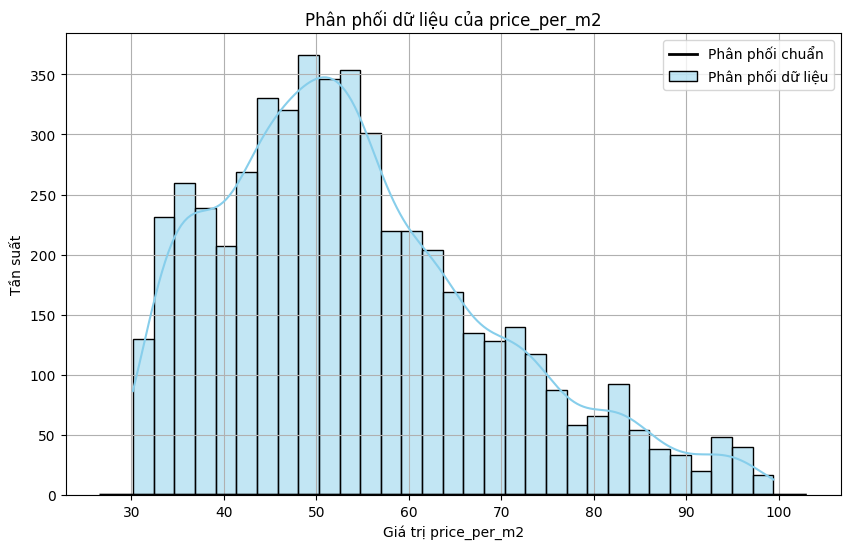

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tính giá trị trung bình và phương sai của cột 'price_per_m2'
mean_value = dataset_df['price_per_m2'].mean()
std_dev = dataset_df['price_per_m2'].std()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset_df['price_per_m2'], kde=True, color='skyblue', label='Phân phối dữ liệu')

# Vẽ đường phân phối chuẩn
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_value, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Phân phối chuẩn')

plt.title('Phân phối dữ liệu của price_per_m2')
plt.xlabel('Giá trị price_per_m2')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

dataset_df=dataset_df[(dataset_df['price_per_m2'] >25)|(dataset_df['price_per_m2'] <110) ]



In [ ]:
# Tính toán tần suất lặp lại của mỗi giá trị trong cột 'Phường'
value_counts = dataset_df['Phường'].value_counts()

# Lấy ra danh sách các giá trị có tần suất lặp lại nhỏ hơn 20
values_to_drop = value_counts[value_counts < 20].index

# Lọc các hàng chứa các giá trị có tần suất lặp lại nhỏ hơn 20
filtered_df = dataset_df[~dataset_df['Phường'].isin(values_to_drop)]


In [ ]:
print(dataset_df['Quận'].value_counts())

Quận
 Cầu Giấy        591
 Thanh Xuân      461
 Quận 2          406
 Nam Từ Liêm     375
 Hà Đông         355
 Quận 7          284
 Quận 4          257
 Hoàng Mai       209
 Bắc Từ Liêm     205
 Gia Lâm         148
 Long Biên       139
 Bình Thạnh      115
 Hai Bà Trưng    104
 Quận 9           78
 Thủ Đức          68
 Quận 10          67
 Tân Phú          66
 Đông Anh         64
 Thanh Trì        64
 Bình Tân         58
 Bình Chánh       54
 Quận 8           47
 Tây Hồ           33
 Đống Đa          32
 Quận 6           30
 Phú Nhuận        27
 Quận 12          26
 Quận 1           20
 Tân Bình         18
 Quận 11          17
 Nhà Bè           15
 Hoài Đức         15
 Quận 5            6
 Đan Phượng        4
 Ba Đình           3
 Quận 3            3
 Gò Vấp            2
 Hoàn Kiếm         1
Name: count, dtype: int64


In [ ]:
print(dataset_df['furniture'].value_counts())

furniture
Cao cấp                                                                         3540
Cơ bản                                                                          1123
Không nội thất                                                                   116
Full nội thất, sàn gỗ, trần thạch cao, tủ bếp, điều hòa, bình nóng lạnh.           9
Full nội thất đẹp.                                                                 9
                                                                                ... 
Cao cấp, gia chủ tâm huyết thiết kế nội thất lên đến 1,1 tỷ                        1
Đầy đủ nội thất và đồ điện tử (cam kết như hình ảnh).                              1
Đầy đủ đồ                                                                          1
Để lại hết nội thất: Có 3 máy lạnh, rèm, máy nước nóng, tủ lạnh, máy giặt...       1
Nội thất cơ bản: Sàn gỗ, tủ bếp, điều hòa, nóng lạnh...                            1
Name: count, Length: 231, dtype: int64


In [ ]:
dataset_df=dataset_df[(dataset_df['furniture'] =='Cao cấp')|(dataset_df['furniture'] =='Cơ bản') ]


In [ ]:

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ/ Sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ chính chủ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ đỏ chính chủ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ đỏ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng lâu dài', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Hợp đồng mua bán.', 'Hợp đồng mua bán', regex=False)



dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đang chờ sổ.', 'Đang chờ sổ', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đang chờ bàn giao sổ.', 'Đang chờ sổ', regex=False)



In [ ]:
dataset_df=dataset_df[(dataset_df['property_legal_document'] =='Sổ đỏ/ Sổ hồng')|(dataset_df['property_legal_document'] =='Hợp đồng mua bán')|(dataset_df['property_legal_document'] =='Đang chờ sổ') ]
dataset_df.head()

,title,links,price,area,price_per_m2,bedroom,toilet,location,description,balcony_direction,house_direction,property_legal_document,furniture,date_submitted,Tỉnh,Quận,Phường,Đường
2,"Bán căn hộ Flemington, Q11, 87m2, 2 phòng ngủ,...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"4,6 tỷ",87.0,52.87,2.0,2.0,"['The Flemington', ' 184', ' Đường Lê Đại Hành...","Bán căn hộ Flemington, địa chỉ: 184 Lê Đại Hàn...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Cao cấp,17/04/2024,Hồ Chí Minh,Quận 11,Phường 15,Đường Lê Đại Hành
4,"Tôi chính chủ bán căn hộ 134m, 4 ngủ, 3vs tại ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"9,5 tỷ",134.0,70.90,4.0,3.0,"['Dự án The Park Home', ' Đường Thành Thái', '...",Tôi chính chủ bán căn hộ 134m tại dự án The Pa...,Đông - Bắc,Tây - Nam,Sổ đỏ/ Sổ hồng,Cao cấp,17/04/2024,Hà Nội,Cầu Giấy,Phường Dịch Vọng,Đường Thành Thái
6,"Bán gấp căn hộ 80m2, 2 phòng ngủ, 2WC, nhà mới...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,5 tỷ,80.0,62.50,2.0,2.0,"['Dự án Eco Green Sài Gòn', ' Đường Nguyễn Văn...",ECOGREENSAIGON mua ở hoặc đầu tư đều tốt.\nBán...,Đông,Bắc,Hợp đồng mua bán,Cơ bản,08/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Thuận Tây,Đường Nguyễn Văn Linh
8,Chuyên chuyển nhượng Chelsea Residence - 3PN 1...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,8 tỷ,115.0,69.56,3.0,2.0,"['Dự án Chelsea Residences', ' Đường Trần Kim ...","+ Hướng cửa TN, ban công ĐB.\n+ Tầng trung vie...",Đông - Bắc,Tây - Nam,Sổ đỏ/ Sổ hồng,Cao cấp,09/04/2024,Hà Nội,Cầu Giấy,Phường Yên Hòa,Đường Trần Kim Xuyến
9,Bán căn 146m2 3PN 2WC view sân bóng nội khu th...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"11,5 tỷ",146.0,78.77,3.0,2.0,"['D’. Le Roi Soleil ', ' 59', ' Đường Xuân Diệ...",Cần bán nhanh căn hộ cao cấp D'. Le Roi Soleil...,Tây - Nam,Tây - Bắc,Sổ đỏ/ Sổ hồng,Cao cấp,12/04/2024,Hà Nội,Tây Hồ,Phường Quảng An,Đường Xuân Diệu


In [ ]:
print(dataset_df['property_legal_document'].value_counts())

property_legal_document
Sổ đỏ/ Sổ hồng      3395
Hợp đồng mua bán     951
Đang chờ sổ          121
Name: count, dtype: int64


In [ ]:
print(dataset_df['furniture'].value_counts())

furniture
Cao cấp    3378
Cơ bản     1089
Name: count, dtype: int64


In [ ]:
print(dataset_df['balcony_direction'].value_counts())

balcony_direction
Đông - Nam    1597
Đông - Bắc     780
Tây - Nam      670
Tây - Bắc      622
Nam            321
Bắc            194
Đông           170
Tây            113
Name: count, dtype: int64


In [ ]:
mean_value = dataset_df['price_per_m2'].mean()

In [ ]:
mean_value

54.449836579359754

In [ ]:
len(dataset_df)

4467

In [ ]:


y = dataset_df['price_per_m2']
X = dataset_df.drop('price_per_m2', axis=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo các pipeline xử lý dữ liệu
numerical_cols = ['area', 'bedroom', 'toilet']  # thay thế các giá trị thực tế của bạn
# categorical_cols = ['balcony_direction',	'house_direction',	'property_legal_document',	'furniture','Đường','Tỉnh',	'Quận',	'Phường']  # thay thế các giá trị thực tế của bạn
categorical_cols = ['house_direction','property_legal_document','furniture','Đường','Tỉnh',	'Quận',	'Phường']  # thay thế các giá trị thực tế của bạn

#
my_cols=categorical_cols+numerical_cols
X_train = X_train[my_cols]
X_test = X_test[my_cols]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Định nghĩa lại my_pipeline với một RandomForestRegressor mặc định
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Function to create the model with hyperparameter space
# Define the parameter distribution
param_dist = {
    'model__n_estimators': randint(240, 300),
    'model__max_depth': randint(5, 8),
    'model__min_samples_split': randint(2, 5)
}

# Create a RandomizedSearchCV object and fit it to the training data
random_search = RandomizedSearchCV(
    estimator=my_pipeline,
    param_distributions=param_dist,
    n_iter=200,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Your best model is now fitted with the best set of hyperparameters
best_model = random_search.best_estimator_

# Use the best model to make predictions
val_preds = best_model.predict(X_test)
print("Validation MAE: ", mean_absolute_error(y_test, val_preds))
# Best parameters found:  {'model__max_depth': 7, 'model__min_samples_split': 2, 'model__n_estimators': 223}


In [ ]:
# joblib.dump(best_model, 'model_chung_cu.pkl')

In [ ]:
dataset_df=pd.read_csv('/content/nhadat_nhatot200.csv')
# #dataset_df_1=dataset_df_1.drop('date_submitted',axis=1)

In [ ]:
dataset_df.head()

,title,links,price,location,description,area,price_per_m2,bedroom,toilet,floors,property_legal_document,house_type,furnishing_sell,width,length,living_size
0,Nhà phố Pháo Đài Láng 45m 5 tầng chỉ hơn 8 Tỷ ...,https://www.nhatot.com/mua-ban-nha-dat-quan-do...,"8,5 tỷ - 45 m2","Phố 224, Phường Láng Thượng, Quận Đống Đa, Hà ...",Nhà phố Pháo Đài Láng 45m 5 tầng chỉ hơn 8 Tỷ ...,45 m²,"188,89 triệu/m²",3,3 phòng,0,Đã có sổ,"Nhà ngõ, hẻm",0,4 m,11 m,45 m²
1,"Nhà mới Khương Đình 36m2 ở luôn, chủ để lại 90...",https://www.nhatot.com/mua-ban-nha-dat-quan-th...,"4,65 tỷ - 36 m2","Khương Đình, Phường Hạ Đình, Quận Thanh Xuân, ...",TRUNG TÂM QUẬN - NHÀ MỚI ĐẸP - Ở LUÔN - 2 THOÁ...,36 m²,"129,17 triệu/m²",6,0,4,Đã có sổ,"Nhà ngõ, hẻm",0,35 m,10 m,0
2,"Nhà bán Hải Bối, Đông Anh, 3 tầng, lô góc, gỗ Lim",https://www.nhatot.com/mua-ban-nha-dat-huyen-d...,"4,5 tỷ - 72 m2","Đường Hải Bối, Xã Hải Bối, Huyện Đông Anh, Hà ...",Chính Chủ muốn bán căn nhà xây dựng tâm huyết ...,72 m²,"62,5 triệu/m²",4,3 phòng,4,Đã có sổ,Nhà phố liền kề,Nội thất cao cấp,4 m,17 m,72 m²
3,"NHÀ MINH KHAI 30 M2 - 4 TẦNG - GIÁ 3,3 TỶ",https://www.nhatot.com/mua-ban-nha-dat-quan-ha...,"3,3 tỷ - 25 m2","Phố Minh Khai, Phường Minh Khai, Quận Hai Bà T...",Nhà Minh Khai diện tích 30 m2 \n- Xây khung cộ...,25 m²,132 triệu/m²,3,0,0,Đã có sổ,"Nhà ngõ, hẻm",0,0,0,0
4,"Nhà VIP Văn Cao, 42m2 MT4.6m, phân lô ô tránh,...",https://www.nhatot.com/mua-ban-nha-dat-quan-ba...,13 tỷ - 42 m2,"Đường Văn Cao, Phường Liễu Giai, Quận Ba Đình,...",PHÂN LÔ - Ô TÔ TRÁNH VỈA HÈ - AN SINH ĐỈNH CAO...,42 m²,"309,52 triệu/m²",4,0,5,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,4.5998 m,0,0
